## Table of Contents

1. [Problem Statement](#section1)<br/>
2. [Data Loading and Description](#section2)
3. [Importing necessary Packages and Dataset](#section3)
4. [Checking shape, size of dataset and missing values](#section4)
5. [Exploring the dataset and plotting various graphs](#section5)    
6. [Dividing the dataset into training, testing and checking the shape](#section6)   
7. [Conclusion](#section7)


### 1. Problem Statement <a class="anchor" id="section1"></a>

To find the factors that improve female literacy rate in India after analysing the dataset.

### 2. Data Loading and description <a class="anchor" id="section2"></a>

 The data set consists of information about __Education Data of 2016-2017__ of India. Various variables present in the dataset includes data of percentage of male, female enrollments, no.of schools etc.

### 3. Importing necessary Packages and dataset <a class="anchor" id="section3"></a>

In [11]:
# Importing Different libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [12]:
# Reading in datasets
import os
print(os.getcwd())
Stat_Elem = pd.read_csv('https://raw.githubusercontent.com/mathasha/herhackathonfinal/master/2015_16_Statewise_Elementary.csv')
Stat_Elem_Met = pd.read_csv('https://raw.githubusercontent.com/mathasha/herhackathonfinal/master/2015_16_Statewise_Elementary_Metadata.csv')
print(Stat_Elem.head())
print(Stat_Elem_Met.head())

/Users/akshayarora/Python Codes/Hackathon_Work
   AC_YEAR  STATCD          STATNAME  DISTRICTS  BLOCKS  VILLAGES  CLUSTERS  \
0  2015-16       1   JAMMU & KASHMIR         22     201      7263      1628   
1  2015-16       2  HIMACHAL PRADESH         12     124     10120      2243   
2  2015-16       3            PUNJAB         22     146     13197      1780   
3  2015-16       4        CHANDIGARH          1      20        84        20   
4  2015-16       5       UTTARAKHAND         13      95     11989       995   

   TOTPOPULAT  P_OF_SCH  POPULATION_0_6    ...     USCR35  NOTCH_ASS  TCHINV  \
0       12549     20.05           16.01    ...       1014      20491    1946   
1        6857      8.69           11.14    ...        652      36054    3053   
2       27704     29.82           10.62    ...       2754      88618   14200   
3        1055     97.25           11.18    ...        117       1994     218   
4       10117     21.54           13.14    ...       1147      12608    1024  

### 4. Checking shape,size of dataset and number of missing values <a class="anchor" id="section4"></a>

In [13]:
print(Stat_Elem.shape)
print(Stat_Elem_Met.shape)

(36, 816)
(816, 2)


In [14]:
#Checking Null Values
print(Stat_Elem.isnull().sum().any())
print(Stat_Elem_Met.isnull().sum().any())

False
False


From above, we can see there are __no missing__ values in the dataset.

In [16]:
Stat_Elem.head

<bound method NDFrame.head of     AC_YEAR  STATCD              STATNAME  DISTRICTS  BLOCKS  VILLAGES  \
0   2015-16       1       JAMMU & KASHMIR         22     201      7263   
1   2015-16       2      HIMACHAL PRADESH         12     124     10120   
2   2015-16       3                PUNJAB         22     146     13197   
3   2015-16       4            CHANDIGARH          1      20        84   
4   2015-16       5           UTTARAKHAND         13      95     11989   
5   2015-16       6               HARYANA         21     126      7438   
6   2015-16       7                 DELHI          9      69      1201   
7   2015-16       8             RAJASTHAN         33     302     41441   
8   2015-16       9         UTTAR PRADESH         75     971     98470   
9   2015-16      10                 BIHAR         38     537     40779   
10  2015-16      11                SIKKIM          4      29       756   
11  2015-16      12     ARUNACHAL PRADESH         20      99      2982   
12  2015

In [17]:
#Checking Overall Literacy Rate
Stat_Elem['OVERALL_LI'].describe()

count    36.000000
mean     78.309444
std       8.257752
min      63.820000
25%      70.937500
50%      78.480000
75%      86.287500
max      93.910000
Name: OVERALL_LI, dtype: float64

 From above we can see that, overall literacy rate is aroung __78.3%__.

In [18]:
Stat_Elem['GROWTHRATE'].describe()

count    36.000000
mean     19.990556
std      11.455856
min      -0.470000
25%      13.880000
50%      18.910000
75%      22.637500
max      55.500000
Name: GROWTHRATE, dtype: float64

 From above we can see that, overall literacy rate is aroung __19.9%__.

### 5. Exploring the dataset and plotting various graphs  <a class="anchor" id="section5"></a>

In [19]:
Stat_Elem[Stat_Elem.GROWTHRATE < 0 ]

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_OF_SCH,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
12,2015-16,13,NAGALAND,11,47,1478,125,1981,17.31,14.44,...,233,21056,1454,6588,6152,1772,167,256,3639,781


 From above we can see that, in year 2015-16, __Nagaland__ has the negative growth rate.

In [20]:
# Overall difference between male and female literacy rates for each state
(Stat_Elem.MALE_LIT - Stat_Elem.FEMALE_LIT).describe()

count    36.000000
mean     13.893611
std       5.679685
min       3.390000
25%      10.130000
50%      13.720000
75%      18.182500
max      27.850000
dtype: float64

 From above we can see that, there is overall difference of __13.89__ in male and female literacy rate that is quite high.

In [21]:
# Lets check the literacy rate of all states through visualization:

# General Function to plot the bar graph after choosing two columns from dataframes
def bar_plot(df, col1, col2, size = (12,12), title = None, xlabel = None):
    '''
    Function to plot bar graph using any two columns from data frame
    Input_Values:
    df - Dataframe that contains the data
    col1 - Column for y-axis
    col2 - Column for x-axis
    size - Figsize attribute of the plot
    title - Title of the plot
    xlabel - x-axis label of the plot
    '''
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,1,figsize = size)
    plt.barh(df[col1],df[col2],label = col2)
            
    if title:
        ax.set_title(title)   
    else:
        ax.set_title('{} vs {}'.format(col2, col1))
    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(col2)
    return plt.show()    

In [22]:
# Function to sort the values:
def sort_vals(df,col):
    '''
    sorts values according to the column provided in ascending order and returns a dataframe with 
    index reset
    
    INPUT:
    df - dataframe to be sorted
    col - column to be sorted on
    
    OUTPUT:
    df_new - sorted dataframe with index reset
    
    '''
    df_new = df.sort_values(by = col)
    df_new.reset_index().drop('index', axis = 1, inplace = True)
    return df_new

In [23]:
# 'OVERALL_LI' is the overall literacy rate for each state
Stat_Elem = sort_vals(Stat_Elem, 'OVERALL_LI')
Stat_Elem.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_OF_SCH,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
9,2015-16,10,BIHAR,38,537,40779,5633,103805,8.36,17.90,...,26429,49110,3614,147323,272919,11332,2481,475,23095,927
35,2015-16,36,TELANGANA,10,459,9934,1776,352,38.67,39.20,...,4823,18295,4418,76082,52862,1982,0,1165,49790,37117
11,2015-16,12,ARUNACHAL PRADESH,20,99,2982,234,1383,16.48,14.66,...,188,5497,504,8564,9020,820,202,304,2022,206
7,2015-16,8,RAJASTHAN,33,302,41441,10594,68621,19.26,15.31,...,11705,40162,2701,125798,253514,120330,979,5189,86126,1720
19,2015-16,20,JHARKHAND,24,260,27862,2264,32966,18.18,15.89,...,5951,30819,3189,92258,125475,7618,556,2004,20625,3254


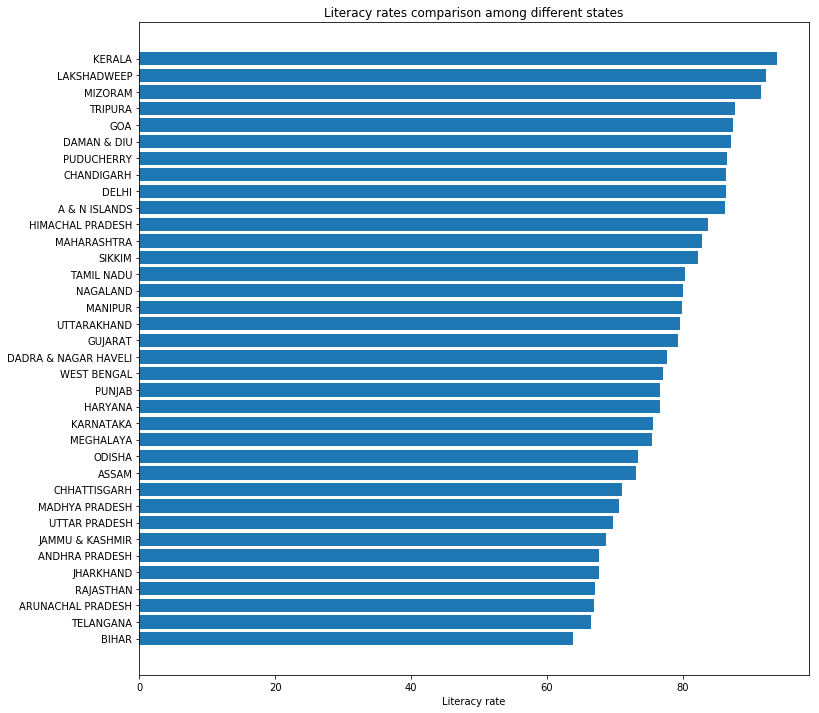

In [24]:
bar_plot(Stat_Elem, 'STATNAME', 'OVERALL_LI', title = 'Literacy rates comparison \
among different states' , xlabel = 'Literacy rate')

From above bar graph, we can see states with highest and lowest literacy rates.

In [25]:
# Sorting Values of male and female literacy rate
Stat_Elem = sort_vals(Stat_Elem, 'FEMALE_LIT')
Stat_Elem1 = sort_vals(Stat_Elem, 'MALE_LIT')

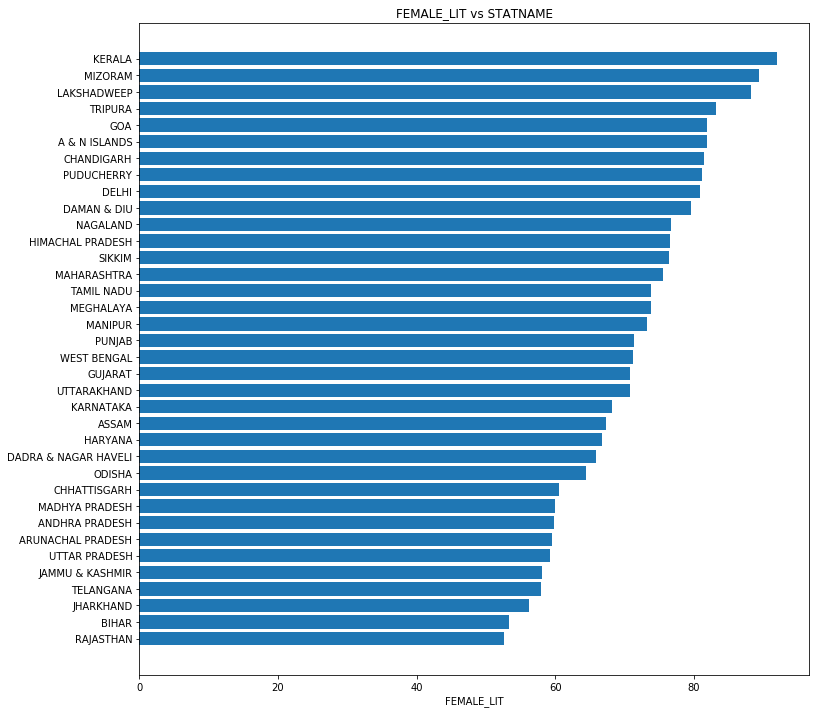

In [26]:
# Plottting Female literacy among different states
bar_plot(Stat_Elem, 'STATNAME', 'FEMALE_LIT')

We can see __Rajasthan__ has worst literacy rate for girls. 

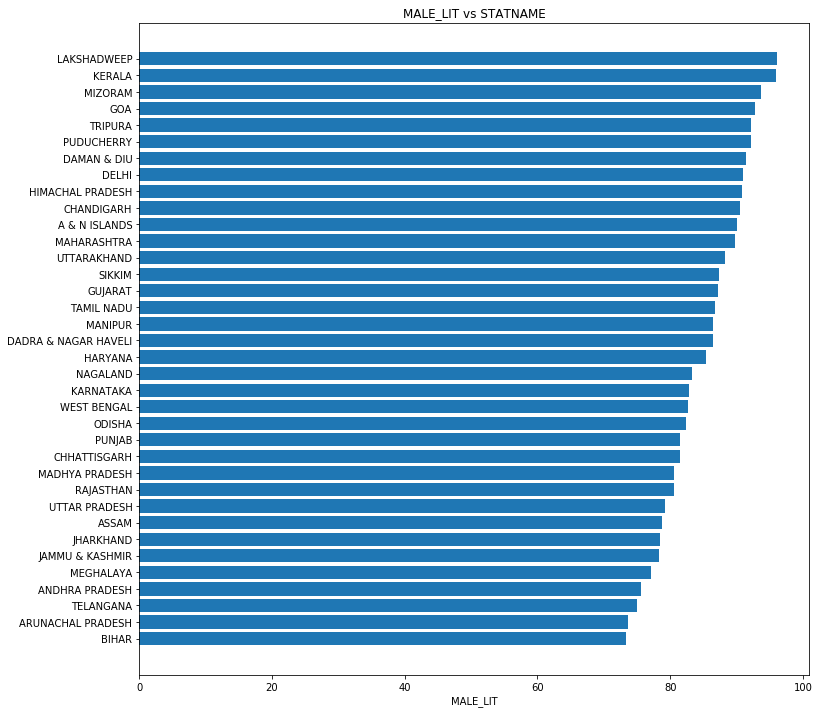

In [27]:
# Plottting male literacy among different states
bar_plot(Stat_Elem1, 'STATNAME', 'MALE_LIT')

We can see __Bihar__ has worst literacy rate for boys. 

In [28]:
#Sorting Overall literacy rate
Stat_Elem = sort_vals(Stat_Elem1, 'OVERALL_LI')

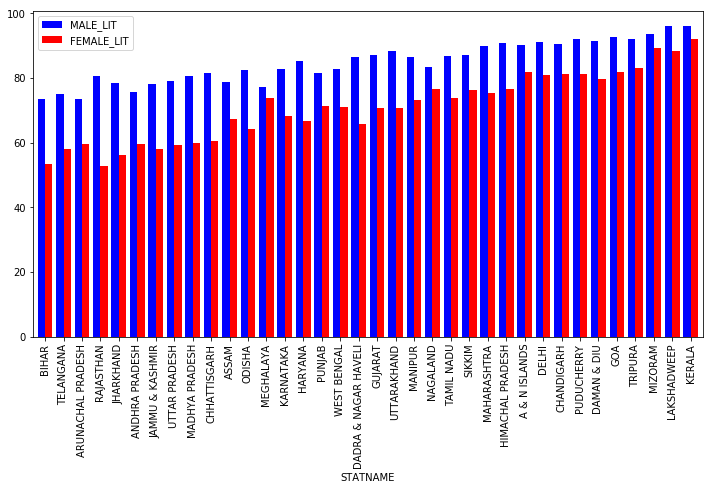

In [29]:
Stat_Elem.plot(kind = 'bar', x = 'STATNAME', y = ['MALE_LIT','FEMALE_LIT'], stacked = False, figsize=(12,6),
              width = 0.8,color = ['blue', 'red'])

From above state, we are seeing all states have diffrence in literacy between male and females. 

In [30]:
# Checking Difference in male and female literacy rate
Stat_Elem['DIFF_LIT'] = Stat_Elem.MALE_LIT - Stat_Elem.FEMALE_LIT 

In [31]:
# Average difference in literacy rates
Diff_lit_mean = Stat_Elem.DIFF_LIT.mean()
print("India's avg difference in literacy rate between men and women is : {}".format(Diff_lit_mean))

India's avg difference in literacy rate between men and women is : 13.89361111111111


In [32]:
# States with the least male and female literacy rates difference
sort_vals(Stat_Elem, 'DIFF_LIT').head()[['STATNAME','DIFF_LIT']]

,STATNAME,DIFF_LIT
16,MEGHALAYA,3.39
31,KERALA,4.04
14,MIZORAM,4.32
12,NAGALAND,6.60
30,LAKSHADWEEP,7.86


In [33]:
# States with the highest male and female literacy rates difference
sort_vals(Stat_Elem, 'DIFF_LIT').tail()[['STATNAME','DIFF_LIT']]

,STATNAME,DIFF_LIT
22,MADHYA PRADESH,20.51
25,DADRA & NAGAR HAVELI,20.53
21,CHHATTISGARH,20.86
19,JHARKHAND,22.24
7,RAJASTHAN,27.85


In [34]:
# Checking the difference in lit_rate of north east states and overall 
North_East = ['NAGALAND','MANIPUR','MIZORAM','ASSAM','TRIPURA','ARUNACHAL PRADESH','MEGHALAYA','SIKKIM']
Stat_Elem.set_index(Stat_Elem.STATNAME,inplace = True)
Ne_diff_lit_mean = Stat_Elem.loc[North_East,'DIFF_LIT' ].mean()
print('The avg in DIFF_LIT for north-eastern states ({}) is much less than the national avg ({}).'.format(Ne_diff_lit_mean,Diff_lit_mean))

The avg in DIFF_LIT for north-eastern states (9.1475) is much less than the national avg (13.89361111111111).


In [35]:
# Preparing Data for top3 and bottom3 states as per literacy rate
# We will drop Telangana from bottom 3 as its been recently founded(2014)
Top_3 = Stat_Elem.sort_values(by = 'OVERALL_LI', ascending = False).head(3)
Bottom_3 = Stat_Elem.sort_values(by = 'OVERALL_LI', ascending = True).head(4).drop('TELANGANA',axis = 0)

In [36]:
Top_bottom = pd.concat([Top_3, Bottom_3], axis = 0, sort = False)
Top_bottom.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_OF_SCH,POPULATION_0_6,...,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,DIFF_LIT
STATNAME,,,,,,,,,,,,,,,,,,,,,
KERALA,2015-16,32,KERALA,14,166,1907,1375,33388,24.76,9.95,...,3561,675,51419,43025,31335,5327,15449,17752,3936,4.04
LAKSHADWEEP,2015-16,31,LAKSHADWEEP,1,3,10,9,64,41.86,11.00,...,2395,209,139,150,49,15,28,11,0,7.86
MIZORAM,2015-16,15,MIZORAM,8,36,851,169,1091,40.42,15.17,...,4917,1386,6593,3267,0,4575,0,0,0,4.32
BIHAR,2015-16,10,BIHAR,38,537,40779,5633,103805,8.36,17.90,...,49110,3614,147323,272919,11332,2481,475,23095,927,20.06
ARUNACHAL PRADESH,2015-16,12,ARUNACHAL PRADESH,20,99,2982,234,1383,16.48,14.66,...,5497,504,8564,9020,820,202,304,2022,206,14.12


In [37]:
# Function to display the string in elemantry column
def display_desc(row):
    '''
    Displays the full string in the description column of the meta elementary dataset
    
    INPUT:
    row - (str) value of the field name you want the description for
    
    '''
    return Stat_Elem_Met[Stat_Elem_Met['Field name'] == row].Description.values[0]

In [38]:
display_desc('TOTPOPULAT')

"Basic data from Census 2011: Total Population(in 1000's)"

In [39]:
#Checking Population Density
Top_bottom.TOTPOPULAT/Top_bottom.AREA_SQKM * 1000

STATNAME
KERALA                859.120500
LAKSHADWEEP          2000.000000
MIZORAM                51.752763
BIHAR                1102.396907
ARUNACHAL PRADESH      16.514813
RAJASTHAN             200.506079
dtype: float64

From above, we can see that population desnsity is not a factor for literacy rate

In [40]:
# DIFF_LIT is the variable we created earlier that by subtracting female literacy rate from the male literacy rate
Top_bottom.DIFF_LIT

STATNAME
KERALA                4.04
LAKSHADWEEP           7.86
MIZORAM               4.32
BIHAR                20.06
ARUNACHAL PRADESH    14.12
RAJASTHAN            27.85
Name: DIFF_LIT, dtype: float64

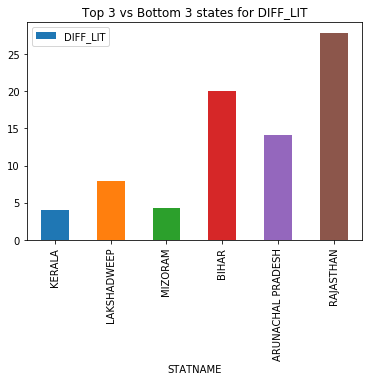

In [42]:
Top_bottom.plot(y = 'DIFF_LIT',kind= 'bar')
plt.title('Top 3 vs Bottom 3 states for DIFF_LIT')
plt.show()

Rajasthan and Bihar has the most difference in male and female literacy rates. 

In [44]:
# Checking Rural and Urban Populations
display_desc('P_OF_SCH')

'Basic data from Census 2011: Percentage School'

In [97]:
# Calculating Rural Population
Top_bottom['P_RUR_POP'] = 100 - Top_bottom['P_URB_POP']

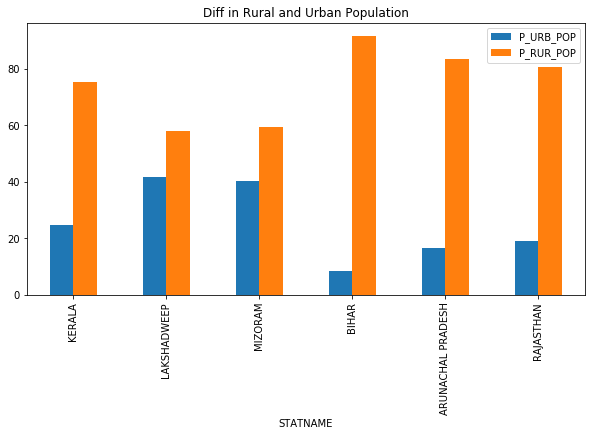

In [98]:
Top_bottom.plot(y = ['P_URB_POP', 'P_RUR_POP'], kind = 'bar', figsize = (10,5))
plt.title('Diff in Rural and Urban Population')
plt.show()

From above, we can clearly see that, rural areas people are less motivated towards education.

In [99]:
#Checking Sex Ratio(Sex ratio is the no. of females per 1000 males)
Stat_Elem.SEXRATIO.mean()

930.8888888888889

In [100]:
Top_bottom.SEXRATIO

STATNAME
KERALA               1084
LAKSHADWEEP           946
MIZORAM               975
BIHAR                 916
ARUNACHAL PRADESH     920
RAJASTHAN             926
Name: SEXRATIO, dtype: int64

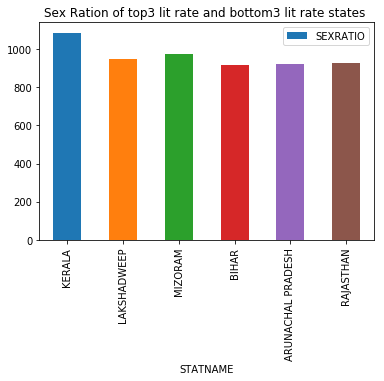

In [101]:
Top_bottom.plot(y ='SEXRATIO', kind = 'bar')
plt.title('Sex Ration of top3 lit rate and bottom3 lit rate states ')
plt.show()

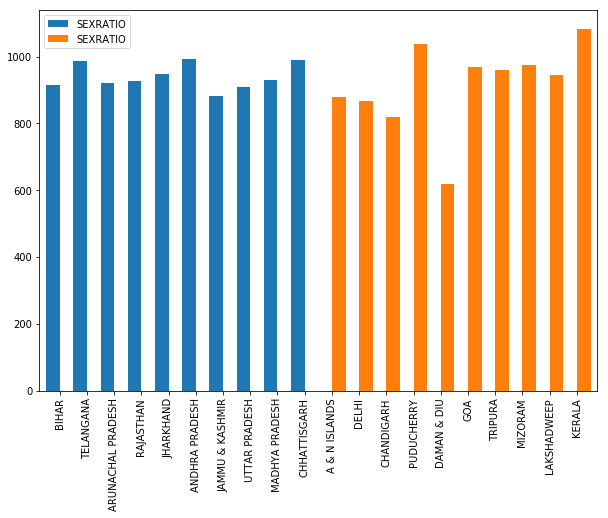

In [102]:
# Including more states for comparison
Stat_Elem.sort_values(by = 'OVERALL_LI', inplace=True)
pd.concat([Stat_Elem.head(10),Stat_Elem.tail(10)], axis = 1, sort = False).plot(kind= 'bar', y = 'SEXRATIO', figsize = (10,7),width = 1)
plt.show()

In [103]:
#Checking Corelation between Sex Ration and Corelation
Stat_Elem.loc[:,['SEXRATIO','OVERALL_LI']].corr()

,SEXRATIO,OVERALL_LI
SEXRATIO,1.000000,-0.037555
OVERALL_LI,-0.037555,1.000000


Clearly the sex ratio has nothing to do with the literacy level.The graphs dont show sex ratio affecting the literacy rate. Also the correlation's too weak.

In [45]:
# Female enrollment and teachers
print(display_desc('P_of_Female_Enroll'))
print(display_desc('P_Female_Teachers'))

Basic data from Census 2011: Percentage of Female Enrollment
Basic data from Census 2011: Percentage  of Female Teachers


We can see that, overall literacy rate doesn't depend on the SC and ST population proportions because these are very different for all the above states.

In [46]:
# Analysing some school related features
Stat_Elem_Met_sc = Stat_Elem_Met[Stat_Elem_Met['Field name'].str.contains(r'^SCH\w*TOT')]
print(Stat_Elem_Met_sc)

    Field name                                        Description
28      SCHTOT                         Schools By Category: Total
37     SCHTOTG             Schools by Category: Government: Total
46     SCHTOTP               Schools by Category: Private : Total
55     SCHTOTM  Schools by Category: Madarsas & Unrecognised: ...
64    SCHTOTGR      Government Schools by Category - Rural: Total
73    SCHTOTGA    Schools by Category: Government & Aided : Total
82    SCHTOTPR         Private Schools by Category - Rural: Total
91   SCHBOYTOT              Schools by Category: Boys Only: Total
100  SCHGIRTOT             Schools by Category: Girls Only: Total


In [108]:
# Lets check kids per school
display_desc('SCHTOT')

'Schools By Category: Total'

In [109]:
display_desc('TOT_6_10_15')

'Projected Population : Age Group 6 to 10'

In [110]:
display_desc('TOT_11_13_15')

'Projected Population : Age Group 11 to 13'

In [111]:
# Total no. of schools for the top 3 and bottom 3 states 
Top_bottom.SCHTOT

STATNAME
KERALA                16458
LAKSHADWEEP              41
MIZORAM                3072
BIHAR                 80166
ARUNACHAL PRADESH      4012
RAJASTHAN            107931
Name: SCHTOT, dtype: int64

In [114]:
# No. of kids in the age group 6-15, i.e, elementary schoolkids
Top_bottom['SCHKIDS'] = Top_bottom.TOT_6_10_15 + Top_bottom.TOT_11_13_15
# No. of kids per school
Top_bottom['KIDSPERSCH'] = Top_bottom.SCHKIDS/Top_bottom.SCHTOT

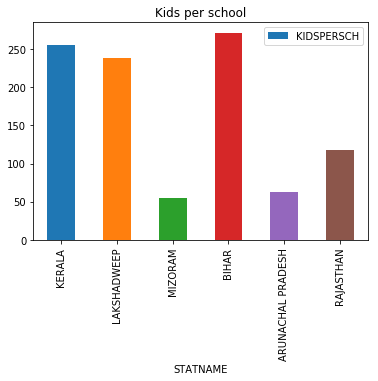

In [119]:
#Plotting kids per school
Top_bottom.plot(y = 'KIDSPERSCH', kind = 'bar')
plt.title('Kids per school')
plt.show()

From above, we can see it is not a good measure to diffrentiate between top3 and bottom 3 schools as we dont know the school size.

### 6. Dividing the dataset into training,testing data and applying random forest model. <a class = "anchor" id = "section6"></a>

In [118]:
#Applying Random Forest Model
X = Stat_Elem.loc[:,Stat_Elem.columns != 'FEMALE_LIT']
X.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_OF_SCH,POPULATION_0_6,...,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G,DIFF_LIT
STATNAME,,,,,,,,,,,,,,,,,,,,,
BIHAR,2015-16,10,BIHAR,38,537,40779,5633,103805,8.36,17.90,...,49110,3614,147323,272919,11332,2481,475,23095,927,20.06
TELANGANA,2015-16,36,TELANGANA,10,459,9934,1776,352,38.67,39.20,...,18295,4418,76082,52862,1982,0,1165,49790,37117,17.03
ARUNACHAL PRADESH,2015-16,12,ARUNACHAL PRADESH,20,99,2982,234,1383,16.48,14.66,...,5497,504,8564,9020,820,202,304,2022,206,14.12
RAJASTHAN,2015-16,8,RAJASTHAN,33,302,41441,10594,68621,19.26,15.31,...,40162,2701,125798,253514,120330,979,5189,86126,1720,27.85
JHARKHAND,2015-16,20,JHARKHAND,24,260,27862,2264,32966,18.18,15.89,...,30819,3189,92258,125475,7618,556,2004,20625,3254,22.24


In [117]:
y = Stat_Elem.loc[:,Stat_Elem.columns == 'FEMALE_LIT']
y.head()

,FEMALE_LIT
STATNAME,
BIHAR,53.33
TELANGANA,57.92
ARUNACHAL PRADESH,59.57
RAJASTHAN,52.66
JHARKHAND,56.21


In [119]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = labelencoder.fit_transform(X.iloc[:,0])

In [121]:
X = pd.DataFrame(X)

In [122]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [123]:
from sklearn.preprocessing import StandardScaler
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X = generate()

In [124]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [125]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25, 1)
(25, 1)
(11, 1)
(11, 1)


In [127]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [128]:
predictions = model.predict(X_test)
print(predictions)

[69.61864 69.61864 69.61864 69.61864 69.61864 69.61864 69.61864 69.61864
 69.61864 69.61864 69.61864]


In [133]:
from sklearn import metrics
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [135]:
print('RMSE for testset is ', RMSE_test )

RMSE for testset is  0.1039


## 7. Conclusion <a class = "anchor" id = "section7"></a>

- This notebook helps us understanding the literacy rate among different states in India. 
- We have observed if we increase the no. of female teachers in various areas that will increase the female literacy rate.
- Bring awareness to the selected villages 
- Increas number of enrollments
- Other applied AI techniques should bring female literacy rates high